In [1]:
################################################################################
# IMPORT LIBRARIES
################################################################################

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

import seaborn as sns
sns.set_style('darkgrid')

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
################################################################################
# SET PATHS
################################################################################

folder_number = '30-batse'
file_path     = './'+folder_number+'/datafile.txt'
info_path     = './'+folder_number+'/simulation_info.txt'
csv_path_all  = './'+folder_number+'/df_all_gen.csv' 

with open(info_path) as f:
    for line in f:
        if line.startswith("sol_per_pop"):
            sol_per_pop = int(line.split()[-1])
            print('sol_per_pop      =', sol_per_pop)
        elif line.startswith("* Best fitness value reached after"):
            gen_best_fitness = int(line.split()[-2])
            print('gen_best_fitness =', gen_best_fitness)
        elif line.startswith("num_generations"):
            num_generations = int(line.split()[-1])
            print('num_generations  =', num_generations)

num_generations  = 15
sol_per_pop      = 2000
gen_best_fitness = 15


# 1. Plot Fitness

In [3]:
################################################################################
# LOAD DATA
################################################################################

generation = []
best_loss  = []
avg_loss   = []	 
std_loss   = []	 
std_loss_div_sqrt_sol_per_pop = [] 

with open(file_path, 'r') as result_file:
    result_file.readline()
    for line in result_file:
        line_split = line.split()
        generation.append( float(line_split[0]) )
        best_loss.append( float(line_split[1]) )
        avg_loss.append( float(line_split[2]) )
        std_loss.append( float(line_split[3]) )
        std_loss_div_sqrt_sol_per_pop.append( float(line_split[4]) )

In [4]:
print(np.min(best_loss))
print(avg_loss[np.argmin(best_loss)])

2.622251252561542
2.807084055468973


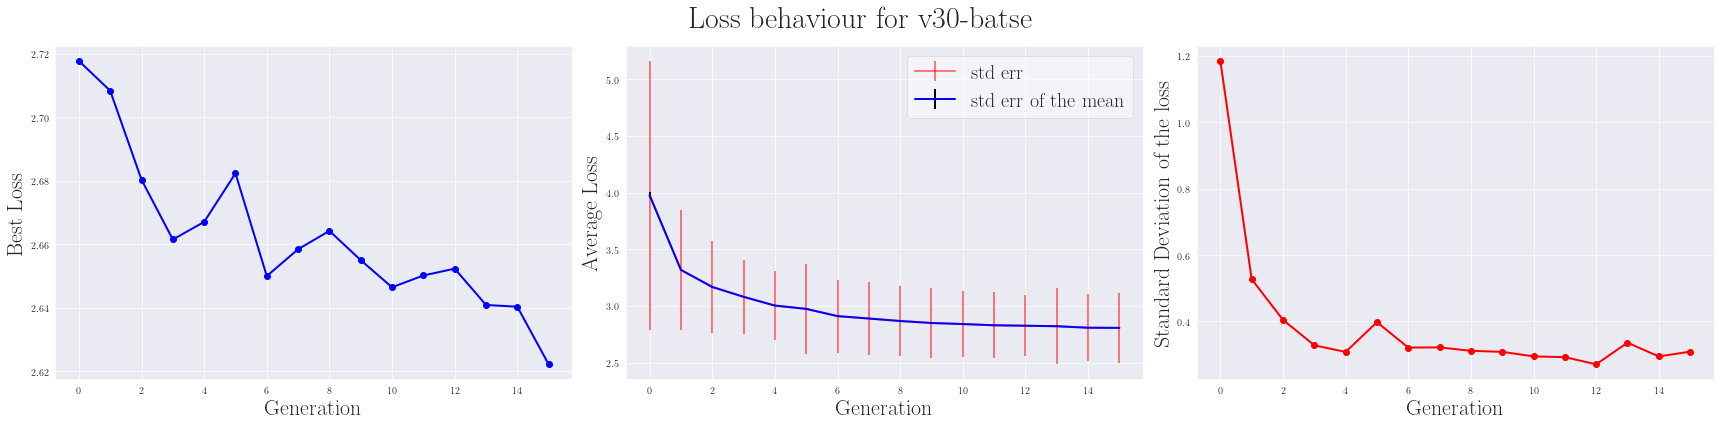

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(24,6))   
################################################################################
# PLOT 1
################################################################################
ax[0].plot(best_loss, ls='-', lw=2, marker='o', c='b')
#plt.set)yscale('log')
ax[0].set_xlabel(r'Generation', size=22)
ax[0].set_ylabel(r'Best Loss',  size=22)
#ax[0].set_aspect('equal')
#ax[0].legend(prop={"size":20}, facecolor='white', framealpha=0.5)
################################################################################
# PLOT 2
################################################################################
ax[1].errorbar(generation, avg_loss, yerr=std_loss,                      ls='-', lw=2, c='r', ecolor='r', alpha=0.5, label='std err')
ax[1].errorbar(generation, avg_loss, yerr=std_loss_div_sqrt_sol_per_pop, ls='-', lw=2, c='b', ecolor='k', alpha=1.0, label='std err of the mean')
#ax[1].yscale('log')
ax[1].set_xlabel(r'Generation',   size=22)
ax[1].set_ylabel(r'Average Loss', size=22)
ax[1].legend(prop={"size":20}, facecolor='white', framealpha=0.5)
################################################################################
# PLOT 3
################################################################################
ax[2].plot(std_loss, ls='-', lw=2, marker='o', c='r')
#ax[2].yscale('log')
ax[2].set_xlabel(r'Generation',                     size=22)
ax[2].set_ylabel(r'Standard Deviation of the loss', size=22)
#ax[2].legend(prop={"size":16}, facecolor='white', framealpha=0.5)
################################################################################
fig.suptitle('Loss behaviour for v'+str(folder_number), size=30)
fig.tight_layout()
plt.savefig('./'+folder_number+'/fig-loss.pdf')
plt.show()

In [6]:
# OLD
################################################################################
# MAKE PLOT
################################################################################

# plt.plot(best_loss, ls='-', lw=2, marker='o', c='b')
# #plt.yscale('log')
# plt.xlabel(r'Generation', size=14)
# plt.ylabel(r'Best Loss',  size=14)
# plt.savefig('./'+folder_number+'/_fig01.pdf')
# plt.show()
# 
# 
# plt.errorbar(generation, avg_loss, yerr=std_loss,                      ls='-', lw=2, c='r', ecolor='r', alpha=0.5, label='std err')
# plt.errorbar(generation, avg_loss, yerr=std_loss_div_sqrt_sol_per_pop, ls='-', lw=2, c='b', ecolor='k', alpha=1.0, label='std err of the mean')
# #plt.yscale('log')
# plt.xlabel(r'Generation',   size=14)
# plt.ylabel(r'Average Loss', size=14)
# plt.legend()
# plt.savefig('./'+folder_number+'/_fig02.pdf')
# plt.show()
# 
# 
# plt.plot(std_loss, ls='-', lw=2, marker='o', c='r')
# #plt.yscale('log')
# plt.xlabel(r'Generation',                     size=14)
# plt.ylabel(r'Standard Deviation of the loss', size=14)
# plt.savefig('./'+folder_number+'/_fig03.pdf')
# plt.show()

# 2. Plot Covariances

In [7]:
################################################################################
# LOAD DATA
################################################################################

df_all_gen = pd.read_csv(csv_path_all)
#all_gen   = df_all_gen.to_numpy()
all_gen    = df_all_gen[['mu', 'mu0', 'alpha', 'delta1', 'delta2', 'tau_min', 'tau_max']].to_numpy()
print('shape(all_gen) =', np.shape(all_gen))


#---------
# ONLY FOR V25 OR BELOW
# all_gen[:,5] = 10**(all_gen[:,5])
#---------


#------------------------------------------------------------------------------#

zeroth_gen = all_gen[:sol_per_pop,:]
#print('shape(zeroth_gen) =', np.shape(zeroth_gen))
#------------------------------------------------------------------------------#

first_gen = all_gen[1*sol_per_pop:2*sol_per_pop,:] 
#print('shape(first_gen) =', np.shape(first_gen))
#------------------------------------------------------------------------------#

gen = 14
custom_gen = all_gen[gen*sol_per_pop:(gen+1)*sol_per_pop,:] 
#print('shape(custom_gen) =', np.shape(custom_gen))
#------------------------------------------------------------------------------#

burn_in_gen    = 3
no_burn_gen    = all_gen[burn_in_gen*sol_per_pop:,:] 
random_samples = no_burn_gen[np.random.choice(no_burn_gen.shape[0], size=10000, replace=False)]
#print('shape(random_samples) =', np.shape(random_samples))
#------------------------------------------------------------------------------#

best_fitness_gen = all_gen[gen_best_fitness*sol_per_pop:(gen_best_fitness+1)*sol_per_pop,:] 
#print('shape(best_fitness_gen) =', np.shape(best_fitness_gen))
#------------------------------------------------------------------------------#

last_gen = all_gen[-sol_per_pop:,:]
#print('shape(last_gen) =', np.shape(last_gen))
#------------------------------------------------------------------------------#

shape(all_gen) = (32000, 7)


In [8]:
to_use = last_gen
np.median(to_use, axis=0)

array([ 1.07877504,  1.17740187,  9.77858216, -0.81091582,  0.1024806 ,
        0.03950773, 32.19545086])

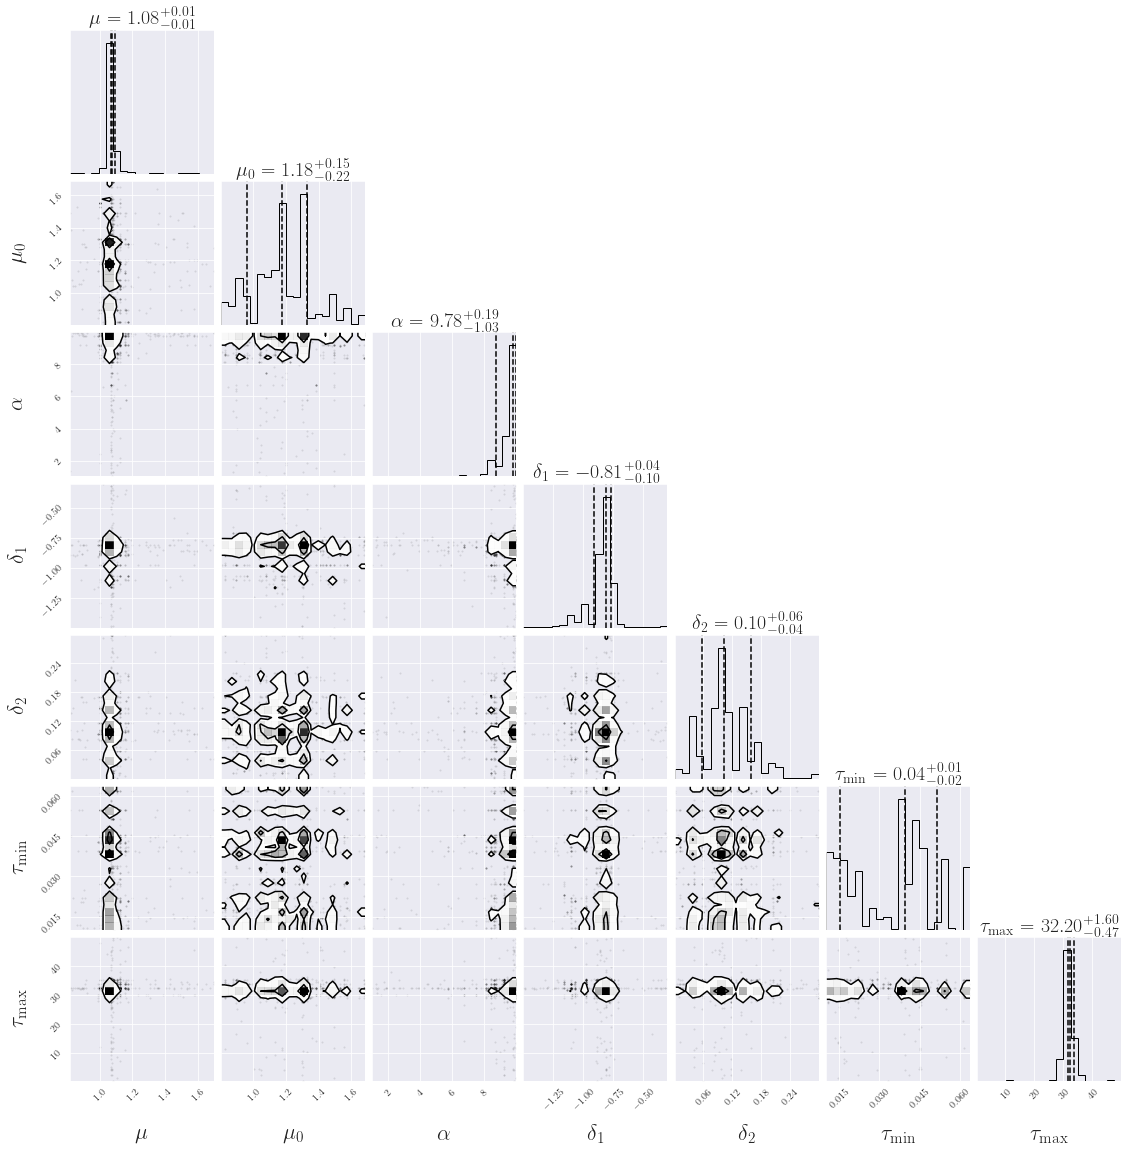

In [9]:
figure = corner.corner(
    #all_gen,
    #zeroth_gen,
    #first_gen,
    #custom_gen,
    #random_samples,
    #best_fitness_gen,
    last_gen,
    labels=[
        r"$\mu$",
        r"$\mu_0$",
        r"$\alpha$",
        r"$\delta_1$",
        r"$\delta_2$",
        r"$\tau_{\mathrm{min}}$",
        r"$\tau_{\mathrm{max}}$",
        #r"Fitness"
    ],
    quantiles=[0.16, 0.5, 0.84],
    levels=[0.39, 0.86], # 1,2 sigmas 
    show_titles=True,
    fill_contours=False,
    smooth=0.1,
    #plot_density=False,
    #plot_datapoints=False,
    #show_titles=True,
    #max_n_ticks=3,
    #title_fmt=".2E",
    label_kwargs={"fontsize": 22},
    title_kwargs={"fontsize": 20},
)
plt.savefig('./'+folder_number+'/fig-correlations.pdf')
plt.show()

# 3. Plot Parameter time-behavior

In [10]:
avg_mu  = np.zeros(num_generations+1)
std_mu  = np.zeros(num_generations+1)
#
avg_mu0  = np.zeros(num_generations+1)
std_mu0  = np.zeros(num_generations+1)
#
avg_alpha  = np.zeros(num_generations+1)
std_alpha  = np.zeros(num_generations+1)
#
avg_delta1  = np.zeros(num_generations+1)
std_delta1  = np.zeros(num_generations+1)
#
avg_delta2  = np.zeros(num_generations+1)
std_delta2  = np.zeros(num_generations+1)
#
avg_tau_min  = np.zeros(num_generations+1)
std_tau_min  = np.zeros(num_generations+1)
#
avg_tau_max  = np.zeros(num_generations+1)
std_tau_max  = np.zeros(num_generations+1)
#
for i in range(num_generations+1):
    avg_mu[i] = np.mean( df_all_gen['mu'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_mu[i] = np.std(  df_all_gen['mu'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_mu0[i] = np.mean( df_all_gen['mu0'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_mu0[i] = np.std(  df_all_gen['mu0'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_alpha[i] = np.mean( df_all_gen['alpha'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_alpha[i] = np.std(  df_all_gen['alpha'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_delta1[i] = np.mean( df_all_gen['delta1'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_delta1[i] = np.std(  df_all_gen['delta1'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_delta2[i] = np.mean( df_all_gen['delta2'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_delta2[i] = np.std(  df_all_gen['delta2'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_tau_min[i] = np.mean( df_all_gen['tau_min'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_tau_min[i] = np.std(  df_all_gen['tau_min'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    #
    avg_tau_max[i] = np.mean( df_all_gen['tau_max'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
    std_tau_max[i] = np.std(  df_all_gen['tau_max'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )

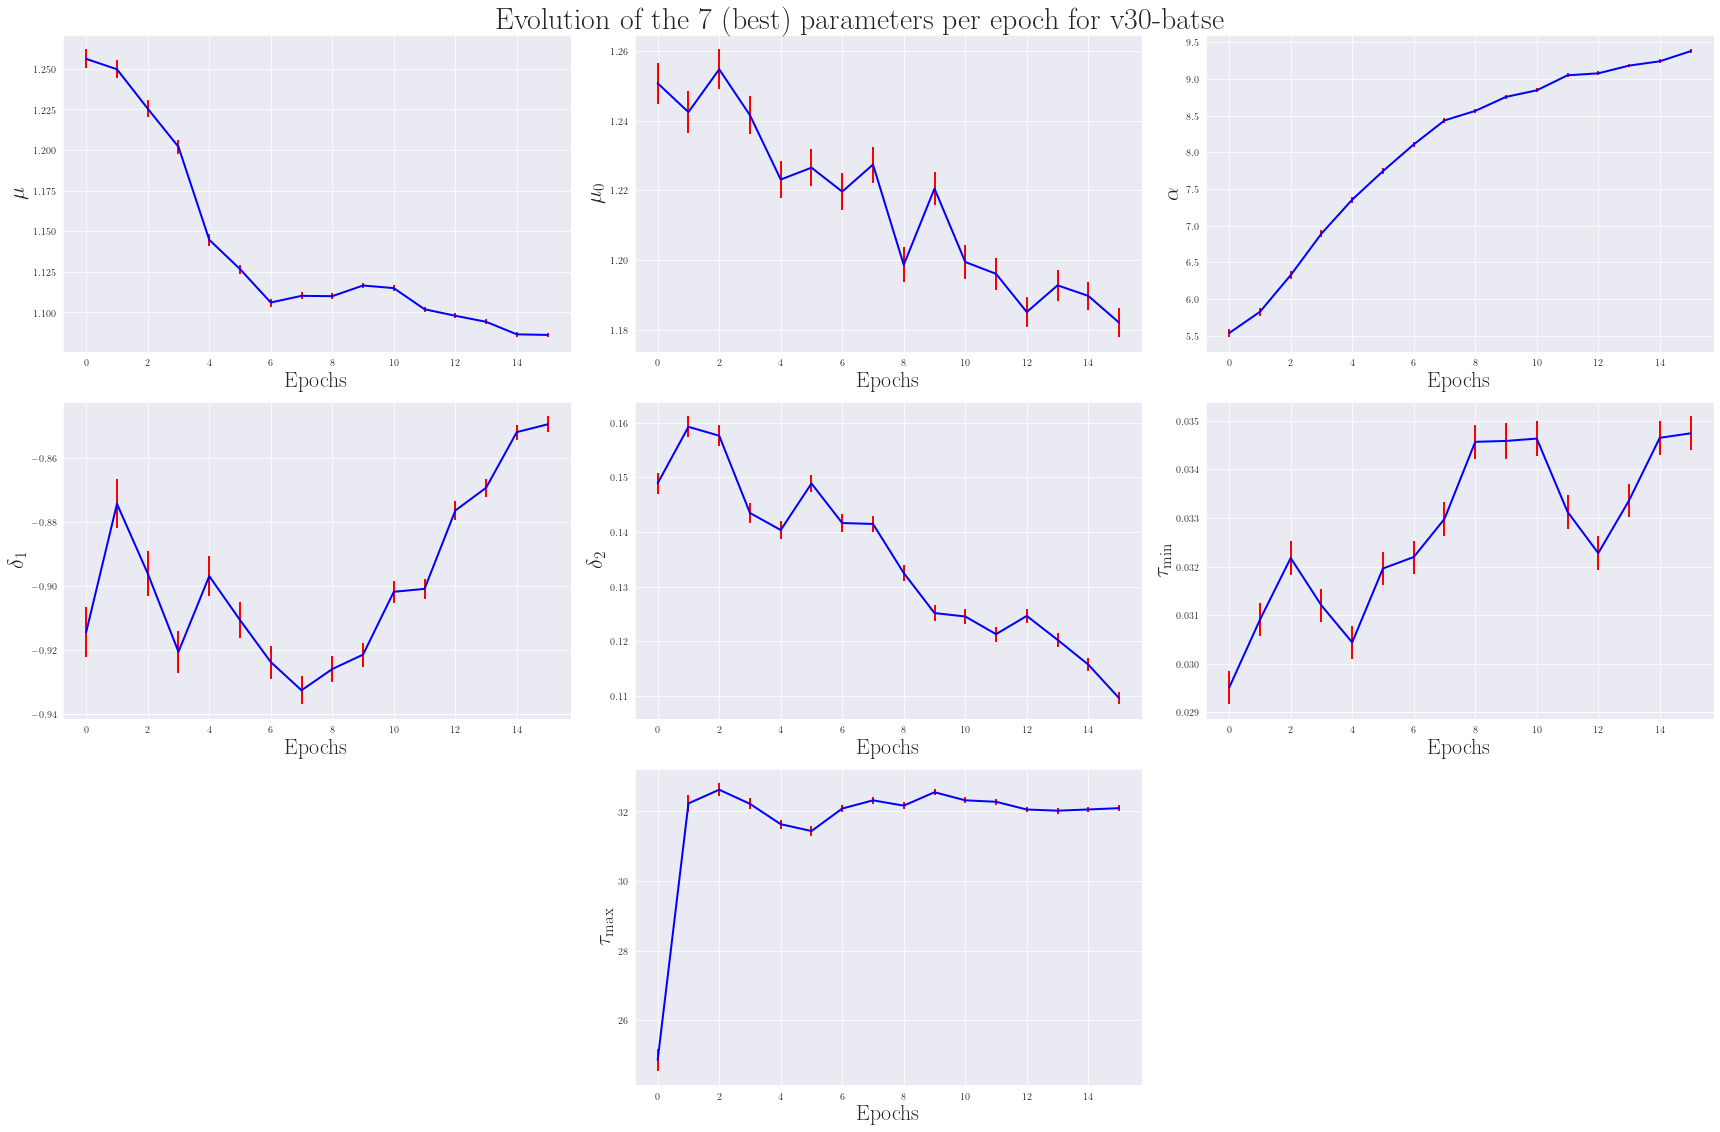

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(24,16))   
################################################################################
# PLOT 1
################################################################################
ax[0,0].errorbar(np.arange(num_generations+1), avg_mu, yerr=std_mu/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[0,0].set_xlabel('Epochs', size=22)
ax[0,0].set_ylabel(r'$\mu$', size=22)
################################################################################
# PLOT 2
################################################################################
ax[0,1].errorbar(np.arange(num_generations+1), avg_mu0, yerr=std_mu0/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[0,1].set_xlabel('Epochs', size=22)
ax[0,1].set_ylabel(r'$\mu_0$', size=22)
################################################################################
# PLOT 3
################################################################################
ax[0,2].errorbar(np.arange(num_generations+1), avg_alpha, yerr=std_alpha/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[0,2].set_xlabel('Epochs', size=22)
ax[0,2].set_ylabel(r'$\alpha$', size=22)
################################################################################
# PLOT 4
################################################################################
ax[1,0].errorbar(np.arange(num_generations+1), avg_delta1, yerr=std_delta1/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[1,0].set_xlabel('Epochs', size=22)
ax[1,0].set_ylabel(r'$\delta_1$', size=22)
################################################################################
# PLOT 5
################################################################################
ax[1,1].errorbar(np.arange(num_generations+1), avg_delta2, yerr=std_delta2/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[1,1].set_xlabel('Epochs', size=22)
ax[1,1].set_ylabel(r'$\delta_2$', size=22)
################################################################################
# PLOT 6
################################################################################
ax[1,2].errorbar(np.arange(num_generations+1), avg_tau_min, yerr=std_tau_min/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[1,2].set_xlabel('Epochs', size=22)
ax[1,2].set_ylabel(r'$\tau_{\min}$', size=22)
################################################################################
# PLOT 7
################################################################################
ax[2,0].set_visible(False)
################################################################################
# PLOT 8
################################################################################
ax[2,1].errorbar(np.arange(num_generations+1), avg_tau_max, yerr=std_tau_max/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
ax[2,1].set_xlabel('Epochs', size=22)
ax[2,1].set_ylabel(r'$\tau_{\max}$', size=22)
################################################################################
# PLOT 9
################################################################################
ax[2,2].set_visible(False)
################################################################################
fig.suptitle('Evolution of the 7 (best) parameters per epoch for v'+str(folder_number), size=30)
fig.tight_layout()
plt.savefig('./'+folder_number+'/fig-params.pdf')
plt.show()

In [12]:
# OLD
################################################################################
# LOAD DATA
################################################################################

# df_all_gen = pd.read_csv(csv_path_all)
# 
# avg_mu  = np.zeros(num_generations+1)
# std_mu  = np.zeros(num_generations+1)
# #
# avg_mu0  = np.zeros(num_generations+1)
# std_mu0  = np.zeros(num_generations+1)
# #
# avg_alpha  = np.zeros(num_generations+1)
# std_alpha  = np.zeros(num_generations+1)
# #
# avg_delta1  = np.zeros(num_generations+1)
# std_delta1  = np.zeros(num_generations+1)
# #
# avg_delta2  = np.zeros(num_generations+1)
# std_delta2  = np.zeros(num_generations+1)
# #
# avg_tau_min  = np.zeros(num_generations+1)
# std_tau_min  = np.zeros(num_generations+1)
# #
# avg_tau_max  = np.zeros(num_generations+1)
# std_tau_max  = np.zeros(num_generations+1)
# #
# 
# for i in range(num_generations+1):
#     avg_mu[i] = np.mean( df_all_gen['mu'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_mu[i] = np.std(  df_all_gen['mu'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     #
#     avg_mu0[i] = np.mean( df_all_gen['mu0'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_mu0[i] = np.std(  df_all_gen['mu0'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     #
#     avg_alpha[i] = np.mean( df_all_gen['alpha'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_alpha[i] = np.std(  df_all_gen['alpha'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     #
#     avg_delta1[i] = np.mean( df_all_gen['delta1'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_delta1[i] = np.std(  df_all_gen['delta1'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     #
#     avg_delta2[i] = np.mean( df_all_gen['delta2'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_delta2[i] = np.std(  df_all_gen['delta2'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     #
#     avg_tau_min[i] = np.mean( df_all_gen['tau_min'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_tau_min[i] = np.std(  df_all_gen['tau_min'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     #
#     avg_tau_max[i] = np.mean( df_all_gen['tau_max'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
#     std_tau_max[i] = np.std(  df_all_gen['tau_max'].to_numpy()[i*sol_per_pop:(i+1)*sol_per_pop] )
# 
# params = [r'$\mu$', r'$\mu_0$', r'$\alpha$', r'$\delta_1$', r'$\delta_2$', r'$\tau_{min}$', r'$\tau_{max}$']
# avg_   = [avg_mu, avg_mu0, avg_alpha, avg_delta1, avg_delta2, avg_tau_min, avg_tau_max]
# std_   = [std_mu, std_mu0, std_alpha, std_delta1, std_delta2, std_tau_min, std_tau_max]
# for i in range(len(params)):
#     plt.errorbar(np.arange(num_generations+1), avg_[i], yerr=std_[i]/np.sqrt(sol_per_pop), ls='-', lw=2, c='b', ecolor='r')
#     plt.xlabel('Epochs', size=20)
#     plt.ylabel(params[i], size=20)
#     plt.show()

In [12]:
# params = [r'$\mu$', r'$\mu_0$', r'$\alpha$', r'$\delta_1$', r'$\delta_2$', r'$\tau_{min}$', r'$\tau_{max}$']
# avg_   = [avg_mu, avg_mu0, avg_alpha, avg_delta1, avg_delta2, avg_tau_min, avg_tau_max]

# DEBUG

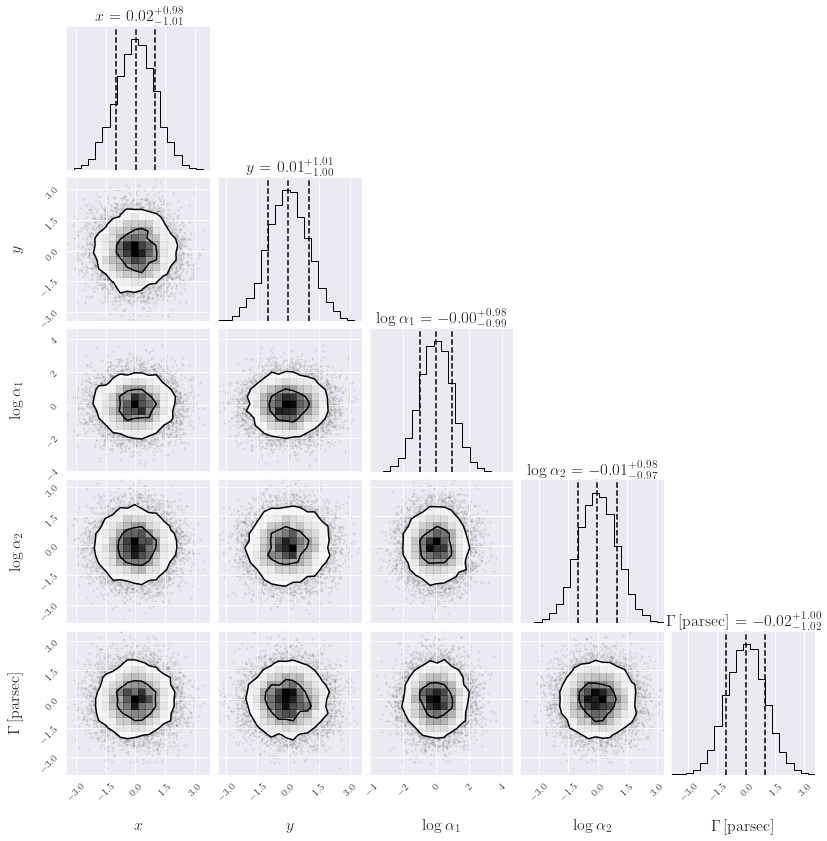

In [7]:
################################################################################
# MAKE PLOT
################################################################################

ndim, nsamples = 5, 10000
samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])
figure = corner.corner(
    samples,
    labels=[
        r"$x$",
        r"$y$",
        r"$\log \alpha_1$",
        r"$\log \alpha_2$",
        r"$\Gamma \, [\mathrm{parsec}]$",
    ],
    quantiles=[0.16, 0.5, 0.84],
    levels=[0.39, 0.86], # 1,2 sigmas 
    show_titles=True,
    fill_contours=False,
    #smooth=0.1,
    #plot_density=False,
    #plot_datapoints=False,
    #show_titles=True,
    #max_n_ticks=3,
    #title_fmt=".2E",
    label_kwargs={"fontsize": 16},
    title_kwargs={"fontsize": 16},
)
plt.show()